*************************************************
# Event View- and Label-Interface
*************************************************

In [1]:
import cait as ai
%config InlineBackend.figure_formats = ['svg']  # we need this for a suitable resolution of the plots

In [2]:
ei = ai.EventInterface(nmbr_channels=2)

Event Interface Instance created.


In [7]:
ei.load_h5(path='test_data/', fname='test_001', channels=[0,1], appendix=False, which_to_label=['events'])

Nmbr triggered events:  160
Nmbr testpulses:  478
Nmbr noise:  160
HDF5 File loaded.


In [8]:
ei.create_labels_csv(path='test_data/')

In [9]:
ei.load_of()
ei.load_sev_par(name_appendix='_down{}'.format(4))

Added the optimal transfer function.
Added the sev fit parameters.


Start labeling from idx 0.
Labels autosave to test_data/labels_test_001_.


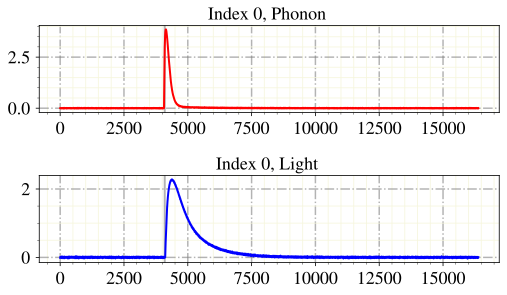

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 0 Phonon (q end, b back, n next, o options, i idx)
Phonon: 1
Assign label for event idx: 0 Light (q end, b back, n next, o options, i idx)
Light: 1


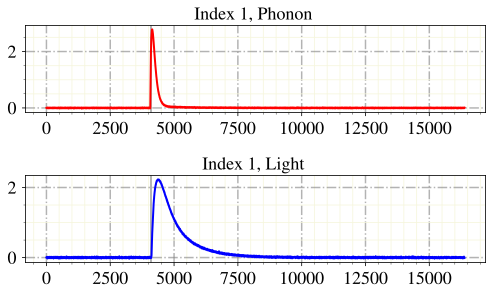

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 1 Phonon (q end, b back, n next, o options, i idx)
Phonon: 1
Assign label for event idx: 1 Light (q end, b back, n next, o options, i idx)
Light: 1


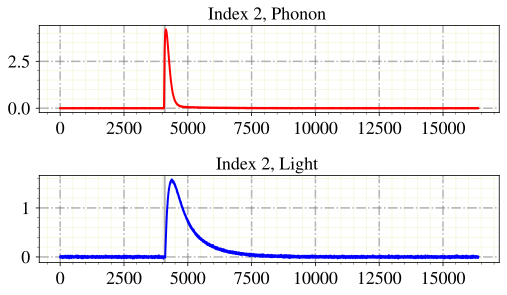

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 2 Phonon (q end, b back, n next, o options, i idx)
Phonon: 1
Assign label for event idx: 2 Light (q end, b back, n next, o options, i idx)
Light: 1


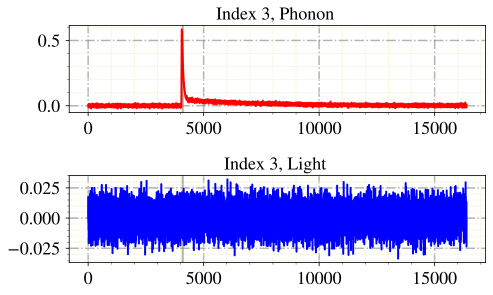

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 3 Phonon (q end, b back, n next, o options, i idx)
Phonon: 8
Assign label for event idx: 3 Light (q end, b back, n next, o options, i idx)
Light: 3


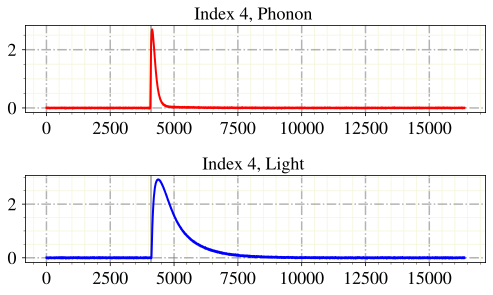

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 4 Phonon (q end, b back, n next, o options, i idx)
Phonon: q
End labeling.


In [10]:
ei.start(start_from_idx=0, print_label_list=False)

In [11]:
channels_rdt = [0,1]
dh = ai.DataHandler(channels=channels_rdt)
dh.set_filepath(path_h5='test_data',
                fname='test_001',
                appendix=False)  # this specifies, that the file does not have a "-P_Ch0..." appendix

DataHandler Instance created.


In [12]:
dh.import_labels(path_labels='test_data/')

Added Labels.
